# Statistical case study

## Roger Gonzalez Sanchez

## 🧪 Introduction
This project presents a complete statistical analysis of the effect of glucose intake on blood glucose levels in a group of adults. The work is structured into three main parts, each focusing on a different analytical approach:

1. Exercise 1 – Descriptive Analysis: We begin with a thorough exploratory data analysis, where we examine key metrics such as mean, median, standard deviation, and distribution shapes to better understand the underlying dataset. Visualization tools like Seaborn and Matplotlib are used to represent data trends and distributions.
2. Exercise 2 – Linear Regression Modeling: We build and interpret a simple linear regression model to assess the relationship between baseline glucose levels and those measured after 60 minutes. Key regression metrics such as R², coefficients, and residuals are analyzed to evaluate the model's predictive power and assumptions.
3. Exercise 3 – Inferential Statistics: A more formal hypothesis testing framework is applied here to assess whether there is a statistically significant difference in glucose levels before and after intake. Depending on the sample size and information available, the script automatically applies either a paired t-test or a z-test, and allows for both one-tailed and two-tailed testing.


The analysis was performed using Python in a Jupyter Notebook, utilizing a range of scientific and statistical libraries:

- Pandas and NumPy for data handling,
- SciPy for statistical tests and critical value computations,
- Seaborn and Matplotlib for visual representation of results.

Overall, the project combines descriptive statistics, predictive modeling, and inferential testing to provide a comprehensive view of how glucose levels change in response to intake — both visually and analytically.

*Note: Make sure to download both this notebook and the dataset_glucose.xlsx file, and place them in the same folder (directory) so the code can run properly.*

## Importing modules and loading the dataframe

In [265]:
#!pip install openpyxl

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm



In [269]:
df = pd.read_excel(
    "dataset_glucose.xlsx"
)


In [270]:
df.head()

,Control group,Fasting glucose level,Glucose level at 60 min
0,1,90,159
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141


In [271]:
control_group1 = df[df["Control group"] == 1]
control_group1.head()

,Control group,Fasting glucose level,Glucose level at 60 min
0,1,90,159
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141


In [272]:
control_group2 = df[df["Control group"] == 2]
control_group2.head()

,Control group,Fasting glucose level,Glucose level at 60 min
35,2,94,180
36,2,96,166
37,2,93,190
38,2,88,174
39,2,79,156


# MEASURES OF CENTRAL TENDENCY

In [196]:
# Mean of group 1 - fasting glucose level
mean_group1_fasting = control_group1["Fasting glucose level"].mean()
mean_group1_fasting

84.68571428571428

In [197]:
# Mean of group 2 - fasting glucose level
mean_group2_fasting = control_group2["Fasting glucose level"].mean()
mean_group2_fasting

89.4

In [198]:
# Median of group 1 - fasting glucose level
median_group1_fasting = control_group1["Fasting glucose level"].median()
median_group1_fasting


82.0

In [199]:
# Median of group 2 - fasting glucose level
median_group2_fasting = control_group2["Fasting glucose level"].median()
median_group2_fasting

90.0

In [200]:
# Mode of group 1 - fasting glucose level
mode_group1_fasting = control_group1["Fasting glucose level"].mode()
mode_group1_fasting.to_list()

[75, 79, 82, 90]

In [201]:
# Mode of group 2 - fasting glucose level
mode_group2_fasting = control_group2["Fasting glucose level"].mode()
mode_group2_fasting.to_list()

[88]

In [202]:
central_tendency_measures = pd.DataFrame(
    {
        "Control Group": ["1", "2"],
        "Mean": [round(mean_group1_fasting, 2), round(mean_group2_fasting, 2)],
        "Median": [round(median_group1_fasting, 2), round(median_group2_fasting, 2)],
        "Mode": [mode_group1_fasting, mode_group2_fasting]
    })

# MEASURES OF DISPERSION

In [203]:
#Range of group 1 - fasting glucose level
range_group1_fasting = control_group1["Fasting glucose level"].max() - control_group1["Fasting glucose level"].min()
range_group1_fasting


38

In [204]:
#Range of group 2 - fasting glucose level
range_group2_fasting = control_group2["Fasting glucose level"].max() - control_group2["Fasting glucose level"].min()
range_group2_fasting


27

In [205]:
# Variance of group 1 - fasting glucose level
variance_group1_fasting = control_group1["Fasting glucose level"].var()
variance_group1_fasting

78.2218487394958

In [206]:
# Variance of group 2 - fasting glucose level
variance_group2_fasting = control_group2["Fasting glucose level"].var()
variance_group2_fasting

53.97241379310345

In [207]:
# Standard deviation of group 1 - fasting glucose level
std_dev_group1_fasting = control_group1["Fasting glucose level"].std()
std_dev_group1_fasting

8.844311660016047

In [208]:
# Standard deviation of group 2 - fasting glucose level
std_dev_group2_fasting = control_group2["Fasting glucose level"].std()
std_dev_group2_fasting

7.346591984934474

In [209]:
# Coefficient of variation of group 1 - fasting glucose level
cv_group1_fasting = std_dev_group1_fasting / mean_group1_fasting
cv_group1_fasting

0.1044368785764378

In [210]:
# Coefficient of variation of group 1 - fasting glucose level
cv_group2_fasting = std_dev_group2_fasting / mean_group2_fasting
cv_group2_fasting

0.08217664412678381

In [211]:
dispersion_measures = pd.DataFrame(
    {
        "Control Group": ["1", "2"],
        "Range": [range_group1_fasting, range_group2_fasting],
        "Variance": [variance_group1_fasting, variance_group2_fasting],
        "Standard deviation": [std_dev_group1_fasting, std_dev_group2_fasting],
        "Coefficient of variation": [cv_group1_fasting, cv_group2_fasting]
    }
)

dispersion_measures

,Control Group,Range,Variance,Standard deviation,Coefficient of variation
0,1,38,78.221849,8.844312,0.104437
1,2,27,53.972414,7.346592,0.082177


# EXERCISE 1a. Obtain the measures of central tendency and dispersion for each of the two control groups for the fasting glucose level. Specify for each case whether the mean is representative or not.

In [212]:
# Creation of a dataframe with central tendency values for groups 1 and 2 for fasting glucose levels
fasting_glucose_level = pd.DataFrame({
    "Control_Group": ["1", "2"],
    "Mean": [mean_group1_fasting, mean_group2_fasting],
    "Median": [median_group1_fasting, median_group2_fasting],
    "Mode": [mode_group1_fasting, mode_group2_fasting],
    "Range": [range_group1_fasting, range_group2_fasting],
    "Variance": [variance_group1_fasting, variance_group2_fasting],
    "Standard_deviation": [std_dev_group1_fasting, std_dev_group2_fasting],
    "Coefficient_variation": [cv_group1_fasting, cv_group2_fasting]
})

In [213]:
fasting_glucose_level

,Control_Group,Mean,Median,Mode,Range,Variance,Standard_deviation,Coefficient_variation
0,1,84.685714,82.0,0 75 1 79 2 82 3 90 Name: Fasting ...,38,78.221849,8.844312,0.104437
1,2,89.400000,90.0,"0 88 Name: Fasting glucose level, dtype: int64",27,53.972414,7.346592,0.082177


# EXERCISE 1b. Study the skewness and kurtosis of the fasting glucose level in adults (control group 2).

In [214]:
# First, filter control group 2 for fasting glucose
control_group_2 = df[df["Control group"] == 2]

# Skewness coefficient of group 2 fasting glucose
skewness_group2_fasting = control_group_2["Fasting glucose level"].skew()

# Kurtosis of group 2 fasting glucose
kurtosis_group2_fasting = control_group_2["Fasting glucose level"].kurtosis()


In [215]:
# Creation of a dataframe with the kurtosis and skewness values for control group 2:

group_2_fasting = pd.DataFrame({
    "Control_Group": "2",
    "Skewness_Coefficient": [skewness_group2_fasting],
    "Kurtosis": [kurtosis_group2_fasting]
})

group_2_fasting

,Control_Group,Skewness_Coefficient,Kurtosis
0,2,-0.007469,-0.612661


With these data, we can observe that since the kurtosis is negative, the distribution would be flatter (platykurtic) with fewer extreme values.

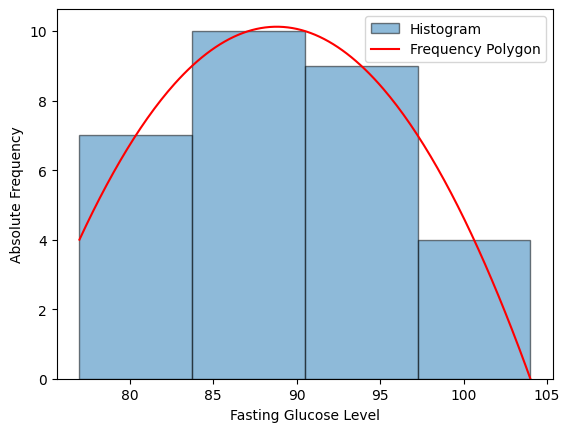

In [216]:
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

data = control_group_2["Fasting glucose level"]  # Select the data to study skewness for group 2 - fasting glucose level
intervals = 4  # Number of bins for the histogram

frequencies, bin_edges = np.histogram(data, bins=intervals)  # Create histogram and get frequencies
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate the midpoint of each bin

plt.hist(control_group_2["Fasting glucose level"],
         bins=intervals,
         alpha=0.5,
         edgecolor='black',
         label="Histogram")  # Plot histogram

# Smooth the polygon line

spline = UnivariateSpline(bin_mids, frequencies, s=5)
x_smooth = np.linspace(bin_edges[0], bin_edges[-1], 200)
y_smooth = spline(x_smooth)

plt.plot(x_smooth, y_smooth, linestyle='-', color='red', label="Frequency Polygon")  # Plot the smoothed frequency polygon

plt.xlabel("Fasting Glucose Level")
plt.ylabel("Absolute Frequency")
plt.legend()
plt.show()

In this case, we might need more data to make more confident statements, but at first glance, the distribution appears fairly symmetrical. There are low values at both ends of the graph (<84 and >97). Regarding skewness, we observe that there is no long tail on either the right or left side, meaning the data is fairly centered.

# EXERCISE 1c. For each study variable (fasting glucose level and glucose level at 60 minutes) in control group 1, indicate the quartile values and their meaning, and obtain the corresponding box plot. Study the presence of outliers.

###  Quartiles

In [217]:
# Creation of a dataframe with quartile values for control group 1 in both variables (fasting glucose level and glucose level at 60 minutes)
quartiles_group1 = pd.DataFrame({
    "Quartiles": ["Q1", "Q2", "Q3", "Q4"],
    "Fasting glucose level": [control_group1["Fasting glucose level"].quantile(0.25),
                             control_group1["Fasting glucose level"].quantile(0.5),
                             control_group1["Fasting glucose level"].quantile(0.75),
                             control_group1["Fasting glucose level"].quantile(1)],
    "Glucose level 60 min": [control_group1["Glucose level at 60 min"].quantile(0.25),
                             control_group1["Glucose level at 60 min"].quantile(0.5),
                             control_group1["Glucose level at 60 min"].quantile(0.75),
                             control_group1["Glucose level at 60 min"].quantile(1)]
})

quartiles_group1

,Quartiles,Fasting glucose level,Glucose level 60 min
0,Q1,78.5,146.5
1,Q2,82.0,150.0
2,Q3,90.5,154.5
3,Q4,103.0,172.0


For the fasting glucose level, we see that 25% of the data have values of 78.5 or lower. The median for this series is 82, which corresponds to Q2. Finally, the value of 90.5 indicates that 75% of the data for this group fall below this value. The same can be said about the "Glucose level at 60 minutes" series.

In [218]:
iqr_group1_fasting = control_group1["Fasting glucose level"].quantile(0.75) - control_group1["Fasting glucose level"].quantile(0.25)
print(f"The interquartile range for control group 1 with fasting glucose level is: {iqr_group1_fasting}")


The interquartile range for control group 1 with fasting glucose level is: 12.0


In [219]:
iqr_group1_60min = control_group1["Glucose level at 60 min"].quantile(0.75) - control_group1["Glucose level at 60 min"].quantile(0.25)
print(f"The interquartile range for control group 1 with glucose level at 60 minutes is: {iqr_group1_60min}")


The interquartile range for control group 1 with glucose level at 60 minutes is: 8.0


In [220]:
# Minimum range for outliers in group 1 fasting glucose:
group1_fasting_lower_outlier = control_group1["Fasting glucose level"].quantile(0.25) - 1.5 * iqr_group1_fasting
group1_fasting_lower_outlier


60.5

In [221]:
# Maximum range for outliers in group 1 fasting glucose:
group1_fasting_upper_outlier = control_group1["Fasting glucose level"].quantile(0.75) + 1.5 * iqr_group1_fasting
group1_fasting_upper_outlier


108.5

In [222]:
# Minimum range for outliers in group 1 glucose level at 60 minutes:
group1_60min_lower_outlier = control_group1["Glucose level at 60 min"].quantile(0.25) - 1.5 * iqr_group1_60min
group1_60min_lower_outlier

134.5

In [223]:
# Maximum range for outliers in group 1 glucose level at 60 minutes:
group1_60min_upper_outlier = control_group1["Glucose level at 60 min"].quantile(0.75) + 1.5 * iqr_group1_60min
group1_60min_upper_outlier


166.5

### Outliers

In [224]:
# I have created a function that tells you what values are outliers based on a serie given
def outliers(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers_x = [value for value in serie if (value < lower_bound) or (value > upper_bound)]
    
    print(f"The following values are outliers: {outliers_x}")

In [225]:
outliers(control_group1["Fasting glucose level"])

The following values are outliers: []


It seems that in the Group 1 – Fasting Glucose series, there are NO outliers; that is, no values below 60.5 or above 108.5. This can be confirmed with the boxplot graph shown below.

In [226]:
outliers(control_group1["Glucose level at 60 min"])

The following values are outliers: [172, 131]


It appears that in the series Group 1 – Glucose at 60 minutes, there are two outlier values: 131 and 172.
Since these are not extreme values, we will keep them in the dataset.

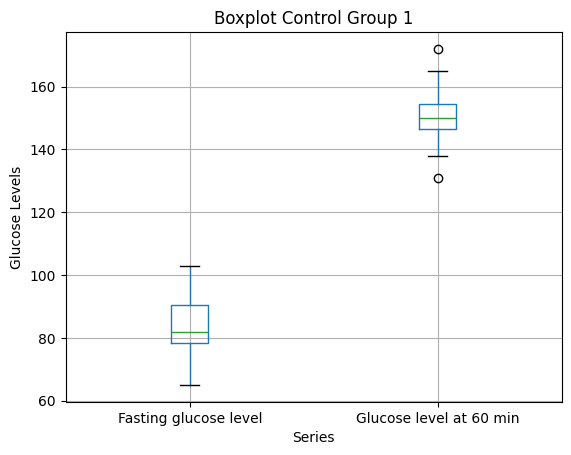

In [227]:
boxplot = control_group1.boxplot(column=["Fasting glucose level", "Glucose level at 60 min"])
boxplot.set_title("Boxplot Control Group 1")
boxplot.set_ylabel("Glucose Levels")
boxplot.set_xlabel("Series")
plt.show()

# Exercise 1d. Study the normality of the data for each of the control groups for glucose levels after 60 minutes.

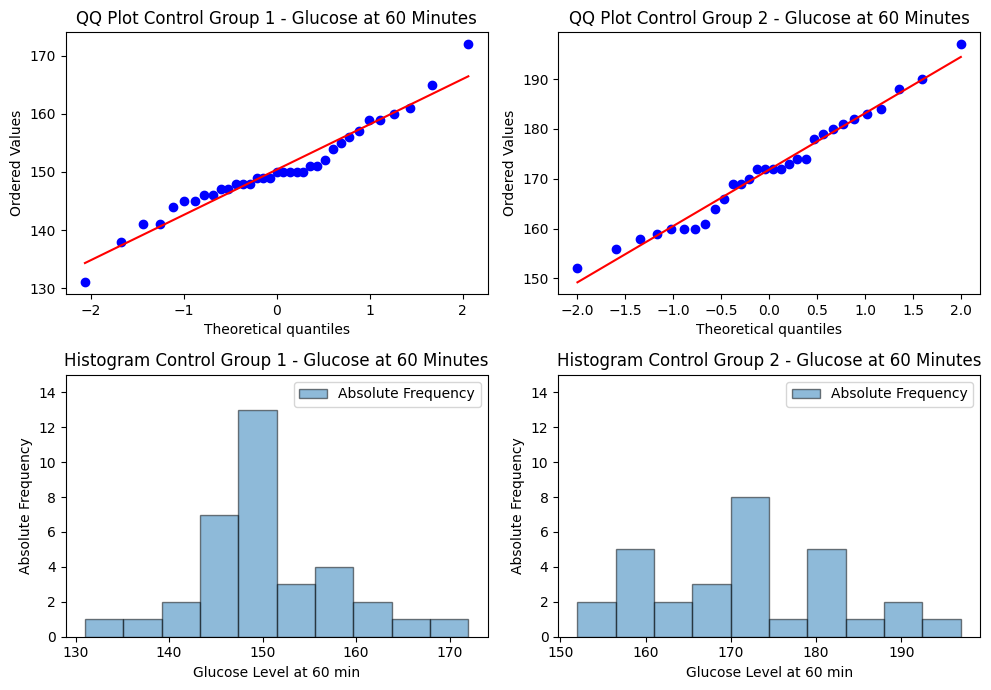

In [228]:
# 4-plot subplot
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
control_group1_60min = control_group1["Glucose level at 60 min"]
control_group2_60min = control_group2["Glucose level at 60 min"]
intervals = 10

# Plot 1 (0,0). QQ Plot Control Group 1 - Glucose at 60 minutes
stats.probplot(control_group1_60min, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("QQ Plot Control Group 1 - Glucose at 60 Minutes")

# Plot 2 (0,1). QQ Plot Control Group 2 - Glucose at 60 minutes
stats.probplot(control_group2_60min, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("QQ Plot Control Group 2 - Glucose at 60 Minutes")

# Plot 3 (1,0). Histogram Control Group 1 - Glucose at 60 minutes
axs[1,0].hist(
    control_group1_60min,
    bins=intervals,
    alpha=0.5,
    edgecolor="black",
    label="Absolute Frequency"
)

axs[1,0].set_xlabel("Glucose Level at 60 min")
axs[1,0].set_ylabel("Absolute Frequency")
axs[1,0].set_title("Histogram Control Group 1 - Glucose at 60 Minutes")
axs[1,0].set_ylim(0 , 15)
axs[1,0].legend()

# Plot 4 (1,1). Histogram Control Group 2 - Glucose at 60 minutes
axs[1,1].hist(
    control_group2_60min,
    bins=intervals,
    alpha=0.5,
    edgecolor="black",
    label="Absolute Frequency"
)

axs[1,1].set_xlabel("Glucose Level at 60 min")
axs[1,1].set_ylabel("Absolute Frequency")
axs[1,1].set_title("Histogram Control Group 2 - Glucose at 60 Minutes")
axs[1,1].set_ylim(0 , 15)
axs[1,1].legend()

plt.tight_layout()
plt.show();



In [229]:
# Shapiro-Wilk test (p-values):

control_group1_60min = control_group1["Glucose level at 60 min"]
control_group2_60min = control_group2["Glucose level at 60 min"]

stat, p1 = stats.shapiro(control_group1_60min)
print("Shapiro-Wilk p-value for Control Group 1 at 60 minutes after glucose intake:", p1)
if p1 > 0.05:
    print("The data appears to be normally distributed (fail to reject H₀)")
else:
    print("The data does not appear to be normally distributed (reject H₀)")

print()

stat, p2 = stats.shapiro(control_group2_60min)
print("Shapiro-Wilk p-value for Control Group 2 at 60 minutes after glucose intake:", p2)
if p2 > 0.05:
    print("The data appears to be normally distributed (fail to reject H₀)")
else:
    print("The data does not appear to be normally distributed (reject H₀)")


Shapiro-Wilk p-value for Control Group 1 at 60 minutes after glucose intake: 0.2734100766567578
The data appears to be normally distributed (fail to reject H₀)

Shapiro-Wilk p-value for Control Group 2 at 60 minutes after glucose intake: 0.7591859818139317
The data appears to be normally distributed (fail to reject H₀)


Based on these plots, we can observe that the distribution appears more normalized in Control Group 2 – glucose levels at 60 minutes, as the data points lie closer to the reference line in the QQ plot.

Lastly, using the Shapiro-Wilk test, we define the hypotheses as follows:

- H₀: p > 0.05 → The data is normally distributed
- H₁: p < 0.05 → The data is not normally distributed

  
In this case, we see that we cannot reject the null hypothesis (H₀), which suggests that both samples follow a normal distribution. In other words, there is little evidence to suggest that either sample deviates from normality.

# Exercise 2a. Study the linear relationship between fasting glucose levels and glucose levels at 60 minutes in Group 1.

In [230]:
# Data filtering
group1 = control_group1[["Fasting glucose level", "Glucose level at 60 min"]]

# Covariance
covariance_group1 = group1["Fasting glucose level"].cov(group1["Glucose level at 60 min"])

print(f"The covariance of Group 1 is: {round(covariance_group1, 4)}")

The covariance of Group 1 is: 54.5118


In [231]:
# Pearson correlation coefficient between fasting glucose and 60-minute glucose levels
correlation_coefficient = group1.corr(method="pearson")
correlation_coefficient

,Fasting glucose level,Glucose level at 60 min
Fasting glucose level,1.000000,0.796405
Glucose level at 60 min,0.796405,1.000000


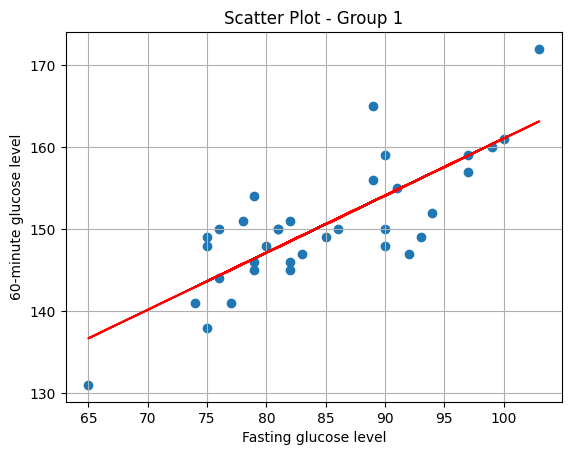

In [232]:
# Scatter plot with regression line
x = group1["Fasting glucose level"]        # Fasting glucose level
y = group1["Glucose level at 60 min"]       # 60-minute glucose level

plt.scatter(x, y)

# Calculate regression line
coeffs = np.polyfit(x, y, 1)
poly = np.poly1d(coeffs)

# Plot regression line
plt.plot(x, poly(x), color="red")

plt.xlabel("Fasting glucose level")
plt.ylabel("60-minute glucose level")
plt.title("Scatter Plot - Group 1")
plt.grid(True)
plt.show()

We found that in Group 1, there is a positive or direct relationship between fasting glucose level and glucose level 60 minutes after intake. That is, the higher the basal glucose level, the higher the glucose level rises one hour after ingesting the preparation.
The positive sign of the covariance indicates that the glucose level at 60 minutes (variable y) depends on the fasting glucose level (variable x). Finally, a linear correlation coefficient of 0.7964 indicates a strong relationship between the two variables.

# Exercise 2b. Obtain a linear model that explains the blood glucose level at 60 minutes as a function of the patient’s basal glucose level, and perform an estimation for a patient whose basal level is 83 mg/dL.

y = b1 * x + b0

In [233]:
mean_group1_60min = group1["Glucose level at 60 min"].mean()

In [234]:
print(f"Variance: {variance_group1_fasting}")
print(f"Covariance: {covariance_group1}")
print(f"Mean: {mean_group1_fasting}")

Variance: 78.2218487394958
Covariance: 54.51176470588236
Mean: 84.68571428571428


In [235]:
b0 = mean_group1_60min-(covariance_group1/variance_group1_fasting)*mean_group1_fasting

In [236]:
b1 = covariance_group1/variance_group1_fasting

In [237]:
linear_model = f"y = {round(b1, 4)} * x + {round(b0, 4)}"

In [238]:
print(f"Variance: {variance_group1_fasting}")
print(f"Covariance: {covariance_group1}")
print(f"Mean: {mean_group1_fasting}")
print(f"B0 is: {round(b0, 4)}")
print(f"B1 is: {round(b1, 4)}")
print(f"The linear regression model is: {linear_model}")

Variance: 78.2218487394958
Covariance: 54.51176470588236
Mean: 84.68571428571428
B0 is: 91.3837
B1 is: 0.6969
The linear regression model is: y = 0.6969 * x + 91.3837


If we want to estimate the glucose level at 60 minutes for a patient whose fasting glucose level is 83 mg/dL, we just need to substitute the values into the regression equation:

In [239]:
estimation = b1 * 83 + b0
print(f"The estimation for a patient with a fasting glucose level of 83 mg/dL is: {round(estimation, 2)} mg/dL")


The estimation for a patient with a fasting glucose level of 83 mg/dL is: 149.23 mg/dL


# Exercise 2c. What percentage of the blood glucose level at 60 minutes remains unexplained by the previous model?

In [240]:
determination_coefficient = correlation_coefficient['Glucose level at 60 min']['Fasting glucose level']**2
percentage_unexplained = 1-determination_coefficient

print(f"The fasting glucose level (x) explains {round((1 - percentage_unexplained) * 100, 2)}% of the variation in glucose level at 60 minutes (Y), so {round(percentage_unexplained * 100, 2)}% remains unexplained.")

The fasting glucose level (x) explains 63.43% of the variation in glucose level at 60 minutes (Y), so 36.57% remains unexplained.


# Exercise 2d. If a patient's fasting glucose level increased by 5 mg/dL, what change would be expected in their glucose level 60 minutes later?

In [241]:
linear_model

'y = 0.6969 * x + 91.3837'

In [242]:
variation = 5*b1
print(f"If we increase a patient’s fasting glucose level by 5 mg/dL, their glucose level at 60 minutes would change by {round(variation, 4)} mg/dL")

If we increase a patient’s fasting glucose level by 5 mg/dL, their glucose level at 60 minutes would change by 3.4844 mg/dL


# Exercise 3a. We want to study whether it can be assumed that the average blood glucose level at the time of ingestion in young people is 88 mg/dL. Obtain the 95% and 99% confidence intervals for the mean blood glucose level of the young group, and then answer the question posed based on the results obtained or by performing a hypothesis test.

Since the population variance is unknown, we will assume a normal distribution and use the Z statistic.

In [243]:
control_group1_fasting = control_group1["Fasting glucose level"]

size_control_group1_fasting = len(control_group1_fasting)

print(f"Sample size: {size_control_group1_fasting}")
print(f"Sample standard deviation: {std_dev_group1_fasting}")
print(f"Sample mean: {mean_group1_fasting}")
print(f"Sample variance: {variance_group1_fasting}")

Sample size: 35
Sample standard deviation: 8.844311660016047
Sample mean: 84.68571428571428
Sample variance: 78.2218487394958


In [244]:
# Obtain the 99% confidence interval for the mean blood glucose level of the young individuals.

desc_stats = sm.stats.DescrStatsW(control_group1_fasting)
conf_int = desc_stats.zconfint_mean(alpha=0.01)  # This provides the confidence interval for the mean at a 1% significance level.
conf_int

(80.83494857956745, 88.53647999186111)

In [245]:
# Obtain the 95% confidence interval for the mean blood glucose level of the young individuals.

desc_stats = sm.stats.DescrStatsW(control_group1_fasting)
conf_int = desc_stats.zconfint_mean(alpha=0.05)  # Esto da el intervalo de confianza para la media con nivel de significacion del 5%
conf_int

(81.75564353663506, 87.6157850347935)

# Exercise 3b. Obtain the 95% confidence intervals for the difference in mean basal glucose levels between adults and young individuals, and interpret the results. Can it be concluded that the basal glucose levels of young people and adults are the same at a 5% significance level? Assume the theoretical initial conditions required to compute the confidence intervals are met.

In [246]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

control_group1_fasting = control_group1["Fasting glucose level"]
control_group2_fasting = control_group2["Fasting glucose level"]

In [247]:
# @title
# OPCION 1

def confidence_interval_difference_means(group1, group2, alpha):
    """
    Calculates the confidence interval for the difference of means between two large samples.

    :param group1: Sample 1 (array-like)
    :param group2: Sample 2 (array-like)
    :param alpha: Significance level (default 0.05 for a 95% CI)
    :return: Confidence interval for the difference of means
    """

    # Sample sizes
    n1 = len(group1)
    n2 = len(group2)

    # Sample means
    mean1 = group1.mean()
    mean2 =  group2.mean()
    mean_difference = mean1 - mean2

    # Sample variances
    var1 =  group1.var()
    var2 =  group2.var()

    # Z value for the confidence interval
    z_alpha_over_2 = stats.norm.ppf(1 - alpha / 2)

    # Combined standard error
    error = np.sqrt((var1 / n1) + (var2 / n2))

    # Calculate confidence interval
    lower_bound = round(mean_difference - z_alpha_over_2 * error, 4)
    upper_bound = round(mean_difference + z_alpha_over_2 * error, 4)

    return lower_bound, upper_bound

alpha = 0.05
interval = confidence_interval_difference_means(control_group1_fasting, control_group2_fasting, alpha)
print(f"The confidence interval for the difference of means is: {interval}")


The confidence interval for the difference of means is: (-8.6508, -0.7777)


In [248]:
# OPCION 2

# Suppose these are the two samples
group_1 = control_group1_fasting
group_2 = control_group2_fasting

# Create DescrStatsW objects
desc1 = DescrStatsW(group_1)
desc2 = DescrStatsW(group_2)

# Compare the means
comparison = CompareMeans(desc1, desc2)

# 95% confidence interval
ci_diff = comparison.zconfint_diff(usevar='unequal')  # Using Welch's test since we consider variances to be unequal between samples

print(f"Confidence interval for the difference of means: {ci_diff}")

Confidence interval for the difference of means: (-8.650833452587902, -0.777737975983543)


It cannot be concluded that the basal glucose level for young people and adults is the same at a 5% significance level. Since the interval does not include 0, there is a statistically significant difference between the mean glucose levels of the two groups.

# Exercise 3c. We want to study the proportion of the population with a basal glucose level above 95 mg/dL (prediabetes). Using the sample data (taking all data points), obtain a 98% confidence interval for this proportion and perform a hypothesis test to check whether the population proportion with glucose levels above 95 mg/dL is 0.15, using a 5% significance level.

We will use a two-tailed test since we need to check whether the proportion is 0.15 or not:
- H₀ (null hypothesis): p = 0.15
- H₁ (alternative hypothesis): p ≠ 0.15

In [249]:
# @title
def proportion_confidence_interval(population_proportion, threshold, group, alpha):
    '''
    Calculates the confidence interval for the sample proportion and performs
    a two-sided hypothesis test to compare it with the given population proportion.

    :param population_proportion: proportion under the null hypothesis (e.g. 0.15)
    :param threshold: cutoff value to consider a high basal level (e.g. 95 mg/dL)
    :param group: array or list with basal glucose level data
    :param alpha: significance level (e.g. 0.05 for 95% confidence interval)
    :return: confidence interval (lower bound, upper bound)
    '''
    
    mean = group.mean()
    std_dev = group.std()
    n = len(group)

    count_above_threshold = 0

    for value in group:
        if value > threshold:
            # Count the number of values greater than the threshold
            count_above_threshold += 1

    z_crit = stats.norm.ppf(1 - alpha / 2)
    sample_proportion = count_above_threshold / n
    error = np.sqrt((sample_proportion * (1 - sample_proportion)) / n)

    lower_bound = round(sample_proportion - z_crit * error, 4)
    upper_bound = round(sample_proportion + z_crit * error, 4)

    z_statistic = (sample_proportion - population_proportion) / np.sqrt((population_proportion * (1 - population_proportion) / n))
    print(f"Your proportion test statistic (Z) is {round(z_statistic, 2)}")
    print(f"The critical Z value for the given significance level is {round(z_crit, 2)}")

    if abs(z_statistic) > z_crit:
        print("Therefore, we reject H0")
    else:
        print("Therefore, we do not reject H0")

    return lower_bound, upper_bound


In [250]:
# 98% CONFIDENCE INTERVAL for the proportion of the population with basal glucose level above 95 mg/dL
# Enter the population proportion as a decimal (15% = 0.15)
# The variable 'threshold' is the value at which we establish the hypothesis
# 'alpha' is the significance level

population_proportion = 0.15
threshold = 95
alpha = 0.02

interval = proportion_confidence_interval(population_proportion, threshold, df["Fasting glucose level"], alpha)
print(f"The confidence interval for the proportion of the population with values greater than {threshold} mg/dL at a significance level of {alpha} is: {interval}")

Your proportion test statistic (Z) is 0.43
The critical Z value for the given significance level is 2.33
Therefore, we do not reject H0
The confidence interval for the proportion of the population with values greater than 95 mg/dL at a significance level of 0.02 is: (0.061, 0.2774)


In [251]:
population_proportion = 0.15
threshold = 95
alpha = 0.05

interval = proportion_confidence_interval(population_proportion, threshold, df["Fasting glucose level"], alpha)
print(f"The confidence interval for the proportion of the population with values greater than {threshold} mg/dL at a significance level of {alpha} is: {interval}")

Your proportion test statistic (Z) is 0.43
The critical Z value for the given significance level is 1.96
Therefore, we do not reject H0
The confidence interval for the proportion of the population with values greater than 95 mg/dL at a significance level of 0.05 is: (0.0781, 0.2604)


With a 95% confidence level, the value p = 0.15 lies within the confidence interval, which means there is not enough evidence to reject the null hypothesis stating that the true proportion is 15%.

# Exercise 3d. Is there a significant change in blood glucose levels in the adult group after ingestion?

#### *Note: The aim is to check whether, as the data suggest, blood glucose levels are different for adults at the time of ingestion and after 60 minutes. Therefore, to answer the question, you should consider the series of data obtained from the differences between the basal level and the glucose level after 60 minutes in the adult group (paired samples test). Formulate the corresponding hypothesis test considering a significance level of 5%.*

For the test statistic, we will follow these guidelines:

- Use "t" if the population standard deviation is unknown (and you only have the sample standard deviation).
- Use "z" if the population standard deviation is known and/or if the sample size is very large (n > 30–40) and the distribution is approximately normal. In this case, we can use the Z-test as an approximation.

Since we are testing if there is a significant variation in any direction, we will use a two-tailed test (alpha/2).

- H₀ (null hypothesis): μ_D = 0 (no significant variation)
- H₁ (alternative hypothesis): μ_D ≠ 0 (there is a significant variation)


In [255]:
# BILATERAL "T" TEST: This test is more precise because it accounts for degrees of freedom.
# I added the option for the function to calculate the test statistic for either two-tailed or one-tailed tests.

def paired_means_variation_t_test(group1, group2, alpha, test_type):
    differences = group1 - group2

    mean_diff = differences.mean()
    std_diff = differences.std()
    n = len(differences)
    degrees_freedom = n - 1

    if test_type == 1:  # Two-tailed test
        t_crit = stats.t.ppf(1 - alpha/2, degrees_freedom)
    else:  # One-tailed test
        t_crit = stats.t.ppf(1 - alpha, degrees_freedom)

    t_stat = mean_diff / (std_diff / np.sqrt(n))

    print(f"Your test statistic for the difference of means is {round(t_stat, 2)}")
    print(f"The critical t value for the given significance level is {round(t_crit, 2)}\n")

    if abs(t_stat) > t_crit:
        print("Therefore, we reject H0 because your test statistic exceeds the critical value.")
    else:
        print("Therefore, we fail to reject H0 because your test statistic does not exceed the critical value.")

    return

# BILATERAL "Z" TEST: This test is less precise but simpler since degrees of freedom are not needed.
# I added the option for the function to calculate the test statistic for either two-tailed or one-tailed tests.

def paired_means_variation_z_test(group1, group2, alpha, test_type):
    differences = group1 - group2

    mean_diff = differences.mean()
    std_diff = differences.std()
    n = len(differences)

    if test_type == 1:  # Two-tailed test
        z_crit = stats.norm.ppf(1 - alpha/2)
    else:  # One-tailed test
        z_crit = stats.norm.ppf(1 - alpha)

    z_stat = mean_diff / (std_diff / np.sqrt(n))

    print(f"Your test statistic for the difference of means is {round(z_stat, 2)}")
    print(f"The critical Z value for the given significance level is {round(z_crit, 2)}")

    if abs(z_stat) > z_crit:
        print("Therefore, we reject H0 because your test statistic exceeds the critical value.")
    else:
        print("Therefore, we fail to reject H0 because your test statistic does not exceed the critical value.")

    return

# TEST TYPE according to sample size: I created a function to decide which test to use depending on sample size.

def paired_means_test(group1, group2, alpha, test_type):
    differences = group1 - group2
    n = len(differences)

    print()

    if n > 30:
        print(f"Since your sample size is greater than {n}, we will use the Z-test for a normal distribution.")
        paired_means_variation_z_test(group1, group2, alpha, test_type)
    else:
        print(f"Since your sample size is {n} or less, we will use the Student's t-test.")
        paired_means_variation_t_test(group1, group2, alpha, test_type)

    return

In [256]:
# @title
test_type = int(input("Is your test two-tailed (1) or one-tailed (2)? "))
alpha = float(input("What is the significance level (in decimals; for example 5% = 0.05)? "))

paired_means_test(control_group2["Glucose level at 60 min"], control_group2["Fasting glucose level"], alpha, test_type)

Is your test two-tailed (1) or one-tailed (2)?  1
What is the significance level (in decimals; for example 5% = 0.05)?  0.05



Since your sample size is 30 or less, we will use the Student's t-test.
Your test statistic for the difference of means is 34.37
The critical t value for the given significance level is 2.05

Therefore, we reject H0 because your test statistic exceeds the critical value.


After this, we see that we must reject the null hypothesis and accept that there may be a significant variation in blood glucose levels in the adult group (2) after glucose intake.